# 原子弹爆炸能量的估计
&emsp;&emsp;英国著名流体力学专家泰勒爵士(Sir Geoffrey I. Taylor)在1947年通过美国政府公布的关于原子弹爆炸过程的系列照片通过量纲分析的方法估算出了当时原子弹所释放的能量,这个值与当时绝密的美国官方估算值非常接近,是关于量纲分析与$\Pi$定理应用的经典案例,该文档所述内容来源于`参考文献1`与`参考文献2`
<br>&emsp;&emsp;泰勒教授经研究后认为原子弹爆炸的物理过程所涉及的关键物理量有5个:1.爆炸释放的能量$E$;2.从爆炸开始算起的时间$t$;3.爆炸产生的火球半径$R$;4.火球外面正常大气的密度$\rho$;5.空气的热容比$\gamma$,下面我们首先引入模块然后再利用这五个关键变量构造出火球半径$R$所满足的关系式,这样就可以利用照片上的火球半径信息估算出原子弹爆炸的能量

In [1]:
import Dimanaly as da
import sympy as sp

In [2]:
R=da.DimVar('R',L=1)
E=da.DimVar('E','能量',regex=True)
gamma=da.DimVar('gamma',value_of_SI=1.4)
rho=da.DimVar('rho','rho_m',value_of_SI=1.25)
AtomicBomb=da.DimFormula([R,E,rho,'t',gamma])
print('输出的表达式为:')
display(AtomicBomb.get_formula())
print('关于R的表达式为:')
expr_forR=AtomicBomb.get_formulafor(R)
display(expr_forR)

输出的表达式为:


Eq(R**(5/2)*sqrt(rho)/(sqrt(E)*t), \Pi(1/gamma))

关于R的表达式为:


Eq(R, E**(1/5)*t**(2/5)*\Pi(1/gamma)**(2/5)/rho**(1/5))

<br>&emsp;&emsp;使用DimFormula对象的get_dimmat()方法可以得到这5个关键变量的量纲表示转置矩阵及相关数值
<br>&emsp;&emsp;另外我们可以看到关于$R$的解不止一个,在使用DimFormula对象的get_formulafor()方法后调用该对象的solutions属性可以查看其他可能的解,可以发现这些解形式都很复杂且含有虚数,不太可能是切合实际的表达式

In [6]:
display(AtomicBomb.get_dimmat())
display(AtomicBomb.solutions[1])

,R,E,rho,t,gamma
L,1.0,2.0,-3.00,0.0,0.0
M,0.0,1.0,1.00,0.0,0.0
T,0.0,-2.0,0.00,1.0,0.0
value_of_SI,NaN,NaN,1.25,NaN,1.4


(-E**(1/10)*t**(1/5)*\Pi(1/gamma)**(1/5)/(4*rho**(1/10)) + sqrt(5)*E**(1/10)*t**(1/5)*\Pi(1/gamma)**(1/5)/(4*rho**(1/10)) - I*E**(1/10)*t**(1/5)*sqrt(sqrt(5)/8 + 5/8)*\Pi(1/gamma)**(1/5)/rho**(1/10))**2

<br>&emsp;&emsp;通过小型实验与已知数据,泰勒教授得到$\Pi(1/\gamma)=(0.926)^{-0.4}\approx 1.03$,而大气密度$\rho$估计为$1.25kg/m^2$ 因此只有从照片式提取到火球半径$R$关于爆炸时间t的规律,通过拟合就可以得出原子弹爆炸的能量数值,考虑到$R$与是$t$乘幂的关系,拟合效果不太直观,两边取对数后得到$\ln R$与$\ln t$之间就呈线性关系了,线性拟合的效果就一目了然了,所以接下来首先对表达式进行取对数化简,之后再代入数值得到$\ln E ,\ln R ,\ln t$之间的线性关系

In [3]:
expr_value=AtomicBomb.get_formulavalue()
display(expr_value)
def oeprate_item(expr):
    '''对式子进行操作'''
    log_expr=sp.log(expr)#取对数
    expand_expr=sp.expand(log_expr)#展开对数
    return expand_expr
def operate_equ(lhs,rhs):
    '''对等式进行操作'''
    op_lhs=oeprate_item(lhs)
    op_rhs=oeprate_item(rhs)
    lhs_new=op_lhs-op_rhs#将式子全移到左边
    equ_new=sp.Eq(lhs_new,0)
    return equ_new
equ_simplify=operate_equ(expr_value.lhs,sp.S(1.03))
display(equ_simplify)

Eq(1.11803398874989*R**(5/2)/(sqrt(E)*t), \Pi(0.714285714285714))

Eq(-log(E)/2 + 5*log(R)/2 - log(t) + 0.0820129734155605, 0)

得到表达式之后我们就可以根据泰勒教授整理的数据进行拟合,数据可见参考文献

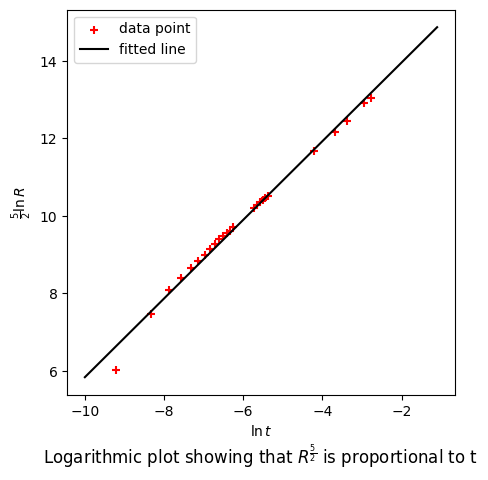

In [4]:
import numpy as np
import matplotlib.pyplot as plt
#初始化数据
t_ms=np.array([0.10,0.24,0.38,0.52,0.66,0.80,0.94,
              1.08,1.22,1.36,1.50,1.65,1.79,1.93,
              3.26,3.53,3.80,4.07,4.34,4.61,
              15.0,25.0,34.0,53.0,62.0])
R_m=np.array([11.1,19.9,25.4,28.8,31.9,34.2,36.3,
              38.9,41.0,42.8,44.4,46.0,46.9,48.7,
              59.0,61.1,62.9,64.3,65.6,67.3,
              106.5,130.0,145.0,175.0,185.0])
ln_t_s=np.log(t_ms*1e-3)
ln_R_m=np.log(R_m)
#拟合
k,b=np.polyfit(ln_t_s,2.5*ln_R_m,1)
tspan=np.arange(-10,-1,0.1)
#作图
fig=plt.figure(figsize=(5,5))
axis=fig.add_subplot()
axis.scatter(ln_t_s,2.5*ln_R_m,marker='+',c='red',label='data point')
axis.plot(tspan,k*tspan+b,c='black',label='fitted line')
axis.set_title('Logarithmic plot showing that $R^\\frac{5}{2}$ is proportional to t',y=-0.2)
axis.set_xlabel('$\ln t$')
axis.set_ylabel('$\\frac{5}{2}\ln R$')
axis.legend()
plt.show()

<br>&emsp;&emsp;根据拟合参数b我们可以算出原子弹爆炸的能量估计值,泰勒教授的计算结果为$1.68\times 10^4$吨当量TNT,而美国官方公布的估计值为$1.8\times 10^4\sim 2.0\times 10^4$吨当量TNT,相差不大

In [5]:
E=np.e**((0.0820129734155605+b)*2)
print('爆炸释放的能量为:%e焦耳'%E)
print('TNT当量:%.2e吨'%(E/4.18e9))

爆炸释放的能量为:9.013981e+13焦耳
TNT当量:2.16e+04吨


参考文献
1. 梁灿彬,曹周健.量纲理论与应用.北京:科学出版社.2020,210-214
2. [Sir Geoffrey Taylor F R S, 1950. The formation of a blast wave by a very intense explosion. II. The atomic explosion of 1945,201:175](https://royalsocietypublishing.org/doi/10.1098/rspa.1950.0050)